In [170]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)
print("done")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

done


In [171]:
!python --version

Python 3.10.13


In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, MaxPooling2D,SeparableConv2D
import numpy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import PIL
import warnings
warnings.filterwarnings('ignore')

In [173]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [174]:
image_generator = ImageDataGenerator(rescale = 1/255)


train = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
train = image_generator.flow_from_directory(train, target_size=(120,120), batch_size=8, class_mode='binary')


test = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'
test = image_generator.flow_from_directory(test, target_size=(120,120), batch_size=8, class_mode='binary')

val = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'
val = image_generator.flow_from_directory(val, target_size=(120,120), batch_size=8, class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [175]:
# # With data augmentation to prevent overfitting and handling the imbalance in dataset

# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.2, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip = True,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(train)

**CNN Model #1**

In [176]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))          
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [177]:
model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_117 (Conv2D)             │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_114               │ (None, 59, 59, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_118 (Conv2D)             │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_115               │ (None, 28, 28, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_119 (Conv2D)             │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_116               │ (None, 13, 13, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_120 (Conv2D)             │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_117               │ (None, 5, 5, 256)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_121 (Conv2D)             │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_118               │ (None, 1, 1, 512)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,700,161 (6.49 MB)

 Trainable params: 1,700,161 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

In [178]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [179]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
  4/652 ━━━━━━━━━━━━━━━━━━━━ 31s 48ms/step - acc: 0.8151 - loss: 0.6622

W0000 00:00:1711876151.783668     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


652/652 ━━━━━━━━━━━━━━━━━━━━ 48s 66ms/step - acc: 0.7442 - loss: 0.5859 - val_acc: 0.6250 - val_loss: 0.4318
Epoch 2/10


W0000 00:00:1711876194.917181     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


652/652 ━━━━━━━━━━━━━━━━━━━━ 44s 67ms/step - acc: 0.8966 - loss: 0.2467 - val_acc: 0.8125 - val_loss: 0.8822
Epoch 3/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - acc: 0.9389 - loss: 0.1484 - val_acc: 0.6875 - val_loss: 0.5578
Epoch 4/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - acc: 0.9596 - loss: 0.1069 - val_acc: 0.6875 - val_loss: 0.5623
Epoch 5/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - acc: 0.9747 - loss: 0.0709 - val_acc: 0.8750 - val_loss: 0.3665
Epoch 6/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - acc: 0.9709 - loss: 0.0724 - val_acc: 0.8750 - val_loss: 0.2593
Epoch 7/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - acc: 0.9801 - loss: 0.0504 - val_acc: 0.9375 - val_loss: 0.2247
Epoch 8/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - acc: 0.9807 - loss: 0.0593 - val_acc: 0.6875 - val_loss: 1.3757
Epoch 9/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 44s 67ms/step - acc: 0.9838 - loss: 0.0409 - val_acc: 0.7500 - val_loss: 0.9981
Epoch 10/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/s

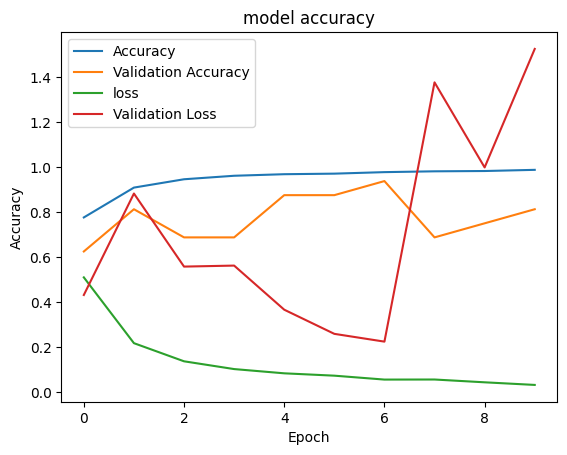

In [180]:
# import matplotlib.pyplot as plt
plt.plot(history.history["acc"])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [181]:
model.evaluate(test)
predictions = model.predict(test)

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - acc: 0.8182 - loss: 1.2422
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


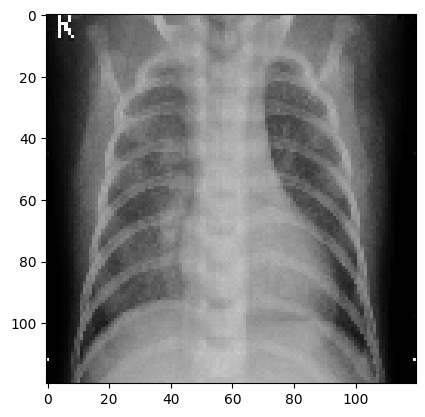

The probability of Pneumonia is:  [1.]


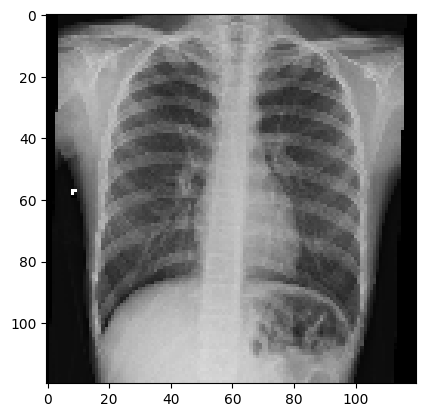

The probability of Pneumonia is:  [0.99964833]


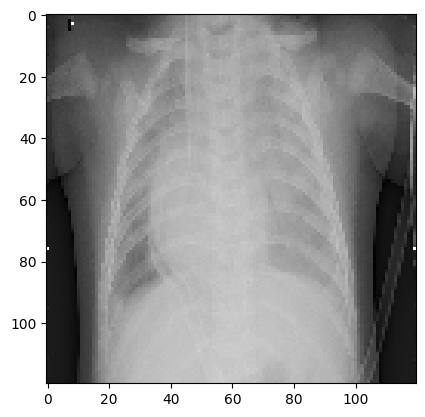

The probability of Pneumonia is:  [1.]


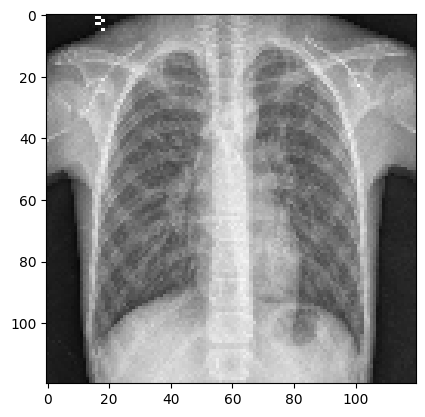

The probability of Pneumonia is:  [0.9887078]


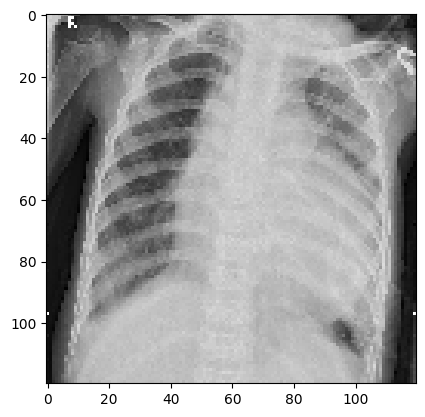

The probability of Pneumonia is:  [1.]


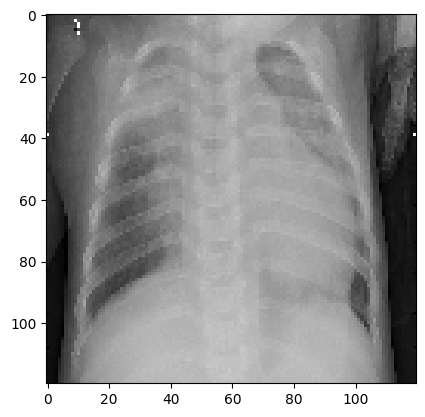

The probability of Pneumonia is:  [1.]


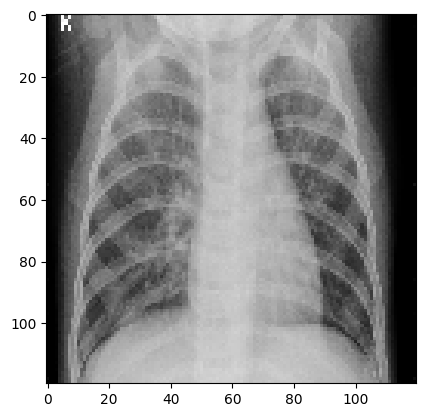

The probability of Pneumonia is:  [0.99999154]


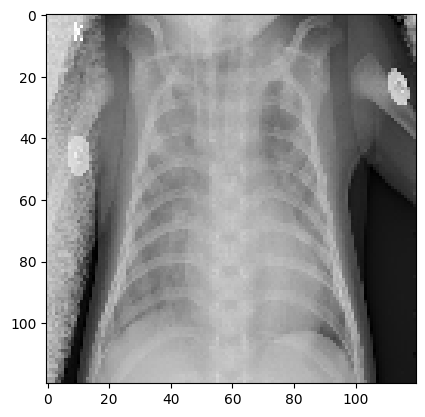

The probability of Pneumonia is:  [1.]


In [182]:
batch_size = test.batch_size
num_batches = 1

for i in range(num_batches):
    x, y = next(test)
    predictions = model.predict(x)
    
    for j in range(min(batch_size, 8)):
        image = x[j]
        plt.imshow(image)
        plt.show()
        print('The probability of Pneumonia is: ', predictions[j])

**CNN Model #2**


In [183]:
model2 = Sequential()
model2.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (120,120,3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Flatten())
model2.add(Dense(units = 128 , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units = 1 , activation = 'sigmoid'))
model2.compile(optimizer = "nadam" , loss = 'binary_crossentropy' , metrics = ['acc'])
model2.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_122 (Conv2D)             │ (None, 120, 120, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_82          │ (None, 120, 120, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_119               │ (None, 60, 60, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_123 (Conv2D)             │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_83          │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_120               │ (None, 30, 30, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_124 (Conv2D)             │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_84          │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_121               │ (None, 15, 15, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_125 (Conv2D)             │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_85          │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_122               │ (None, 8, 8, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_126 (Conv2D)             │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_86          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_123               │ (None, 4, 4, 256)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 128)            │       524,41

 Total params: 952,065 (3.63 MB)

 Trainable params: 950,977 (3.63 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [184]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [185]:
hist = model2.fit(train ,epochs = 10 ,steps_per_epoch=200 ,validation_data = val ,callbacks = [learning_rate_reduction])

Epoch 1/10
  4/200 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - acc: 0.6068 - loss: 2.0013

W0000 00:00:1711876610.393008     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - acc: 0.8563 - loss: 0.5268 - val_acc: 0.5000 - val_loss: 7.1809 - learning_rate: 0.0010
Epoch 2/10
  4/200 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - acc: 0.8177 - loss: 0.2782

W0000 00:00:1711876624.391989     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - acc: 0.9322 - loss: 0.1734 - val_acc: 0.5000 - val_loss: 3.6977 - learning_rate: 0.0010
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - acc: 0.9648 - loss: 0.1078 - val_acc: 0.6250 - val_loss: 1.7671 - learning_rate: 0.0010
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9657 - loss: 0.0950 - val_acc: 0.5000 - val_loss: 3.7377 - learning_rate: 0.0010
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - acc: 0.9561 - loss: 0.1263 - val_acc: 0.8125 - val_loss: 0.3231 - learning_rate: 0.0010
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - acc: 0.9756 - loss: 0.0621 - val_acc: 1.0000 - val_loss: 0.0427 - learning_rate: 0.0010
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - acc: 0.9609 - loss: 0.0991 - val_acc: 0.5000 - val_loss: 4.1665 - learning_rate: 0.0010
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9702 - loss: 0.0975 - val_acc: 0.8125 - val_loss: 0.6919 - learning_rate: 0.0010
Epoch

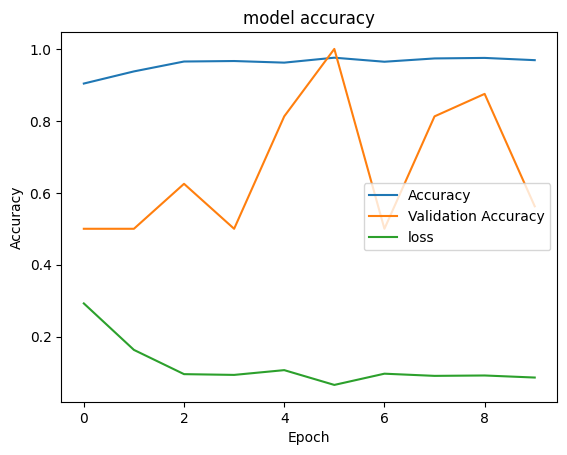

In [186]:
# import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss"])
plt.show()

In [187]:
model2.evaluate(test)
predictions2 = model2.predict(test)

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - acc: 0.6999 - loss: 1.3423
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


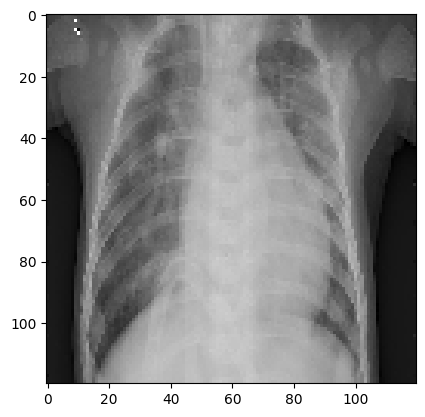

The probability of Pneumonia is:  [1.]


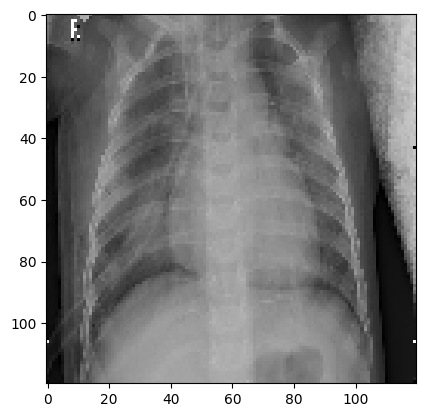

The probability of Pneumonia is:  [0.9999995]


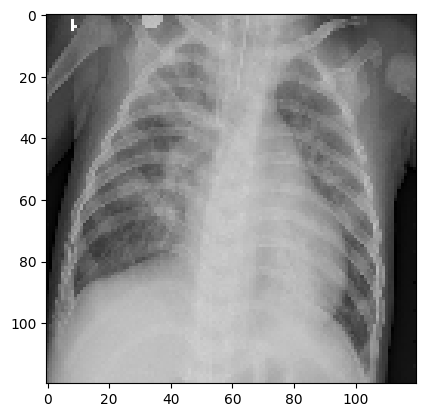

The probability of Pneumonia is:  [1.]


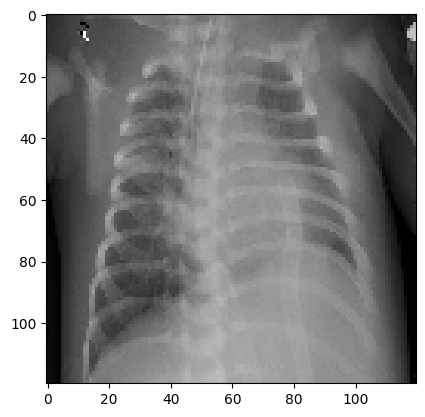

The probability of Pneumonia is:  [0.999985]


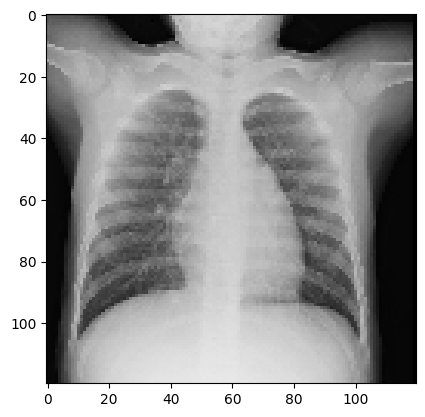

The probability of Pneumonia is:  [0.21393904]


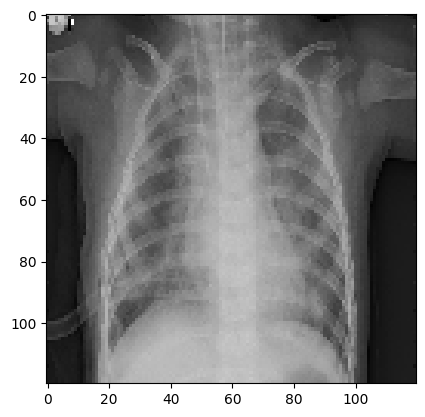

The probability of Pneumonia is:  [1.]


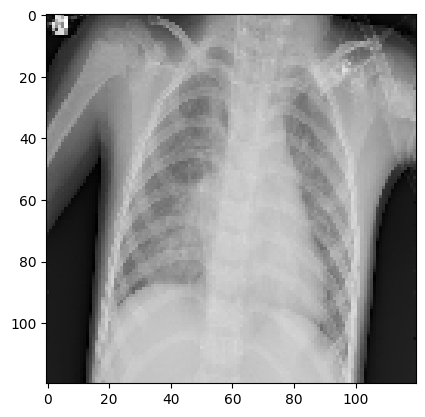

The probability of Pneumonia is:  [1.]


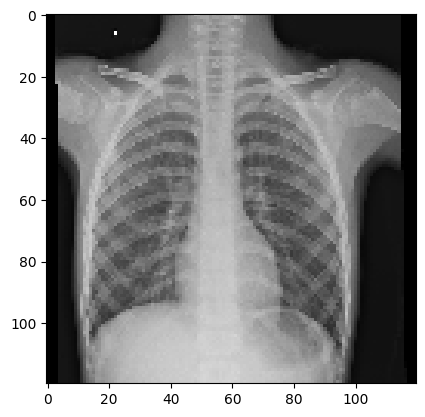

The probability of Pneumonia is:  [0.56572443]


In [188]:
batch_size = test.batch_size
num_batches = 1

for i in range(num_batches):
    x, y = next(test)
    predictions = model2.predict(x)
    
    for j in range(min(batch_size, 8)):
        image = x[j]
        plt.imshow(image)
        plt.show()
        print('The probability of Pneumonia is: ', predictions[j])

**CNN Model #3**

In [189]:
model3 = Sequential()

model3.add(Conv2D(input_shape=(120,120,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model3.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(SeparableConv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(SeparableConv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(SeparableConv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(SeparableConv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(SeparableConv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(SeparableConv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(SeparableConv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(SeparableConv2D(filters=1028, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(SeparableConv2D(filters=1028, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(SeparableConv2D(filters=1028, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2,2)))



model3.add(Flatten())
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.7))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(1, activation='sigmoid'))


In [190]:

model3.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_127 (Conv2D)             │ (None, 120, 120, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_128 (Conv2D)             │ (None, 120, 120, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_124               │ (None, 60, 60, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_99             │ (None, 60, 60, 128)    │         8,896 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_100            │ (None, 60, 60, 128)    │        17,664 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_125               │ (None, 30, 30, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_101            │ (None, 30, 30, 256)    │        34,176 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_87          │ (None, 30, 30, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_102            │ (None, 30, 30, 256)    │        68,096 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_126               │ (None, 15, 15, 256)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_103            │ (None, 15, 15, 512)    │       133,888 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_88          │ (None, 15, 15, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_104            │ (None, 15, 15, 512)    │       267,264 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_89          │ (None, 15, 15, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_105            │ (None, 15, 15, 512)    │       267,264 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_127               │ (None, 7, 7, 512)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_106            │ (None, 7, 7, 1028)     │       531,972 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 13,515,797 (51.56 MB)

 Trainable params: 13,509,125 (51.53 MB)

 Non-trainable params: 6,672 (26.06 KB)

In [191]:
model3.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])

In [192]:
# history3 = model3.fit(train,validation_data=val, epochs=10)
history3 = model3.fit(train, epochs=10, validation_data=val,steps_per_epoch=200,callbacks = [learning_rate_reduction])

Epoch 1/10
  4/200 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - acc: 0.5911 - loss: 0.6928

W0000 00:00:1711876754.549303     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 74ms/step - acc: 0.7319 - loss: 0.6186 - val_acc: 0.5000 - val_loss: 0.8400 - learning_rate: 1.0000e-04
Epoch 2/10
  3/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - acc: 0.8333 - loss: 0.3143

W0000 00:00:1711876769.293274     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - acc: 0.8226 - loss: 0.3445 - val_acc: 0.5000 - val_loss: 1.1223 - learning_rate: 1.0000e-04
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - acc: 0.8682 - loss: 0.2733 - val_acc: 0.5000 - val_loss: 0.6920 - learning_rate: 1.0000e-04
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8973 - loss: 0.2531 - val_acc: 0.5000 - val_loss: 0.8248 - learning_rate: 1.0000e-04
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - acc: 0.9140 - loss: 0.2220 - val_acc: 0.8125 - val_loss: 0.4788 - learning_rate: 1.0000e-04
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - acc: 0.9065 - loss: 0.2398 - val_acc: 0.6250 - val_loss: 0.7647 - learning_rate: 1.0000e-04
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - acc: 0.9322 - loss: 0.1737 - val_acc: 0.6250 - val_loss: 0.7006 - learning_rate: 1.0000e-04
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9244 - loss: 0.1774 - val_acc: 0.6250 - val_loss: 0.7148 - lea

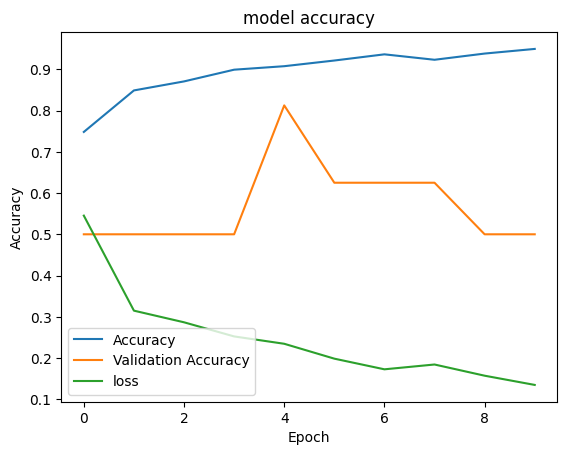

In [193]:
# import matplotlib.pyplot as plt
plt.plot(history3.history["acc"])
plt.plot(history3.history['val_acc'])
plt.plot(history3.history['loss'])
# plt.plot(history3.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss"])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step


W0000 00:00:1711876876.751104     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


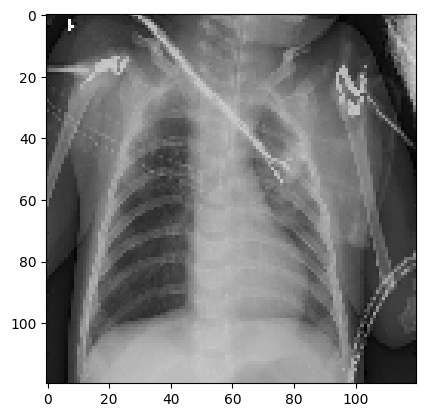

The probability of Pneumonia is:  [0.9977525]


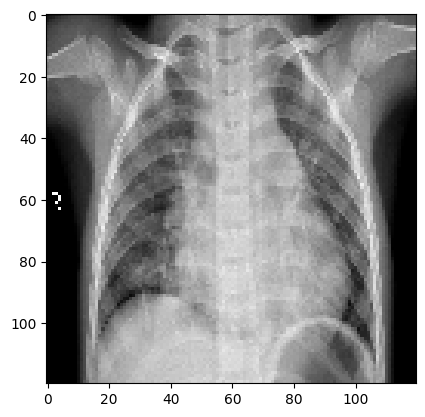

The probability of Pneumonia is:  [0.98875195]


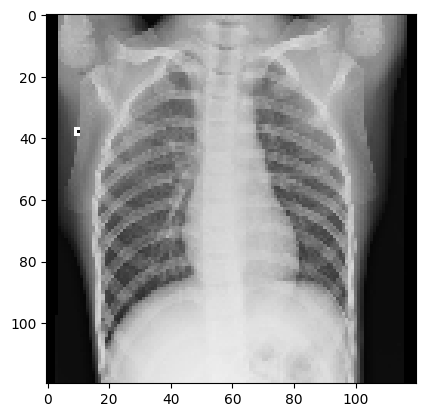

The probability of Pneumonia is:  [0.6003097]


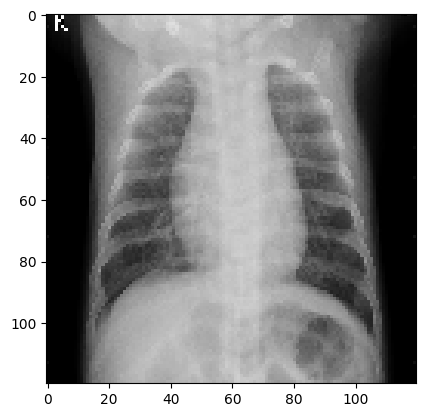

The probability of Pneumonia is:  [0.9989122]


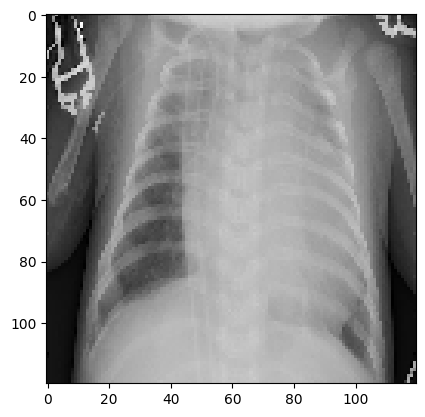

The probability of Pneumonia is:  [0.9999391]


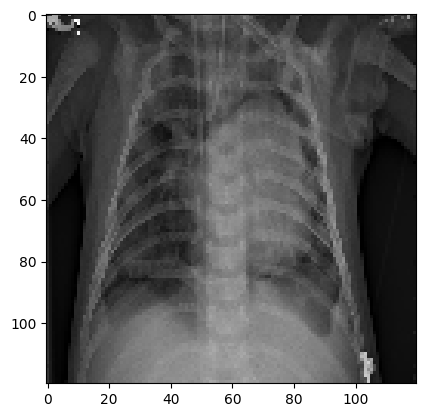

The probability of Pneumonia is:  [0.9991043]


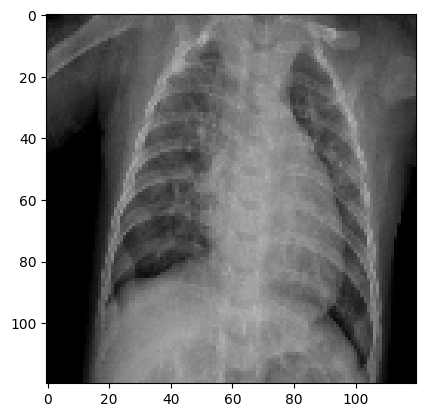

The probability of Pneumonia is:  [0.99907935]


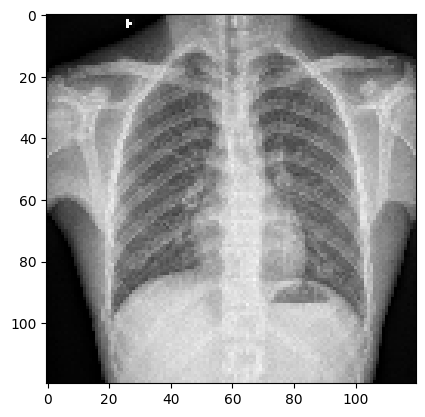

The probability of Pneumonia is:  [0.62982637]


In [194]:
batch_size = test.batch_size
num_batches = 1

for i in range(num_batches):
    x, y = next(test)
    predictions = model3.predict(x)
    
    for j in range(min(batch_size, 8)):
        image = x[j]
        plt.imshow(image)
        plt.show()
        print('The probability of Pneumonia is: ', predictions[j])

In [195]:
model2.evaluate(test)
predictions2 = model2.predict(test)

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - acc: 0.7086 - loss: 1.2868
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step


**CNN Model #4**



In [196]:
model4 = Sequential()
model4.add(Conv2D(input_shape=(120,120,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(MaxPooling2D(2,2))
model4.add(Dropout(0.3))
model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(Dropout(0.3))
model4.add(MaxPooling2D(2,2))
model4.add(Dropout(0.3))
model4.add(Conv2D(128,(3,3),activation='relu'))
model4.add(Conv2D(128,(3,3),activation='relu'))
model4.add(Conv2D(128,(3,3),activation='relu'))
model4.add(MaxPooling2D(2,2))
model4.add(Dropout(0.3))
model4.add(Conv2D(128,(3,3),activation='relu'))
model4.add(Conv2D(256,(3,3),activation='relu'))
model4.add(MaxPooling2D(2,2))
model4.add(Dropout(0.3))
model4.add(Flatten())
model4.add(Dense(512,activation = 'relu'))
model4.add(Dense(512,activation = 'relu'))
model4.add(Dropout(0.3))
model4.add(Dense(1,activation='sigmoid'))

In [197]:
model4.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])

In [198]:
history4 = model4.fit(train, epochs=10, validation_data=val,steps_per_epoch=100, callbacks = [learning_rate_reduction])

Epoch 1/10
  4/100 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - acc: 0.4766 - loss: 0.6939

W0000 00:00:1711876901.707209     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - acc: 0.6801 - loss: 0.6383 - val_acc: 0.5000 - val_loss: 0.7403 - learning_rate: 1.0000e-04
Epoch 2/10
  3/100 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - acc: 0.8264 - loss: 0.4695

W0000 00:00:1711876909.114770     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - acc: 0.7404 - loss: 0.5774 - val_acc: 0.5000 - val_loss: 0.6941 - learning_rate: 1.0000e-04
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - acc: 0.7531 - loss: 0.5631 - val_acc: 0.5000 - val_loss: 0.6945 - learning_rate: 1.0000e-04
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - acc: 0.7406 - loss: 0.5346 - val_acc: 0.6250 - val_loss: 0.7147 - learning_rate: 1.0000e-04
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - acc: 0.8132 - loss: 0.3782 - val_acc: 0.8750 - val_loss: 0.5801 - learning_rate: 1.0000e-04
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - acc: 0.8338 - loss: 0.3727 - val_acc: 0.6250 - val_loss: 0.6895 - learning_rate: 1.0000e-04
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - acc: 0.8292 - loss: 0.3969 - val_acc: 0.5625 - val_loss: 1.5668 - learning_rate: 1.0000e-04
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - acc: 0.8160 - loss: 0.3844 - val_acc: 0.6875 - val_loss: 0.5984 - learning

In [199]:
model4.evaluate(test)
predictions2 = model4.predict(test)

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - acc: 0.8097 - loss: 0.4335
 5/78 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step

W0000 00:00:1711876972.367152     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step


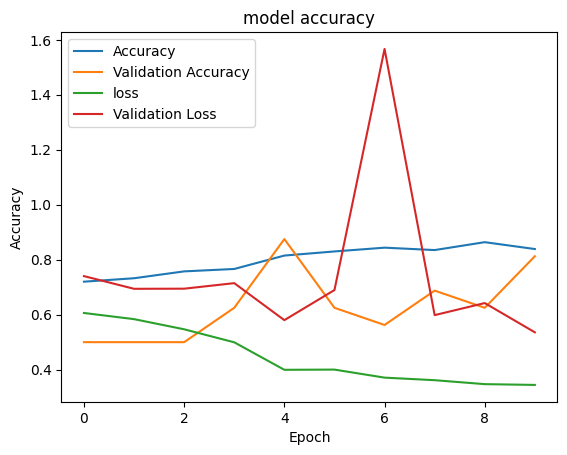

In [200]:
# import matplotlib.pyplot as plt
plt.plot(history4.history["acc"])
plt.plot(history4.history['val_acc'])
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


W0000 00:00:1711876977.702633     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


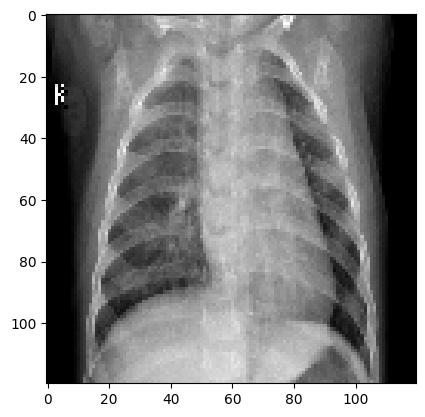

The probability of Pneumonia is:  [0.39379254]


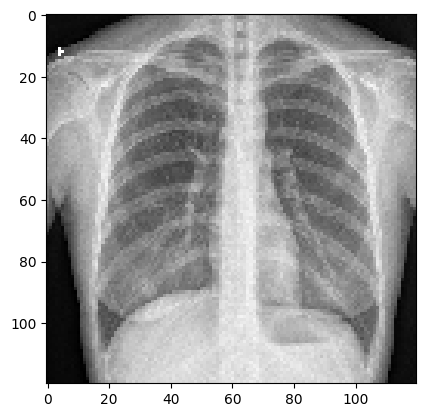

The probability of Pneumonia is:  [0.25235608]


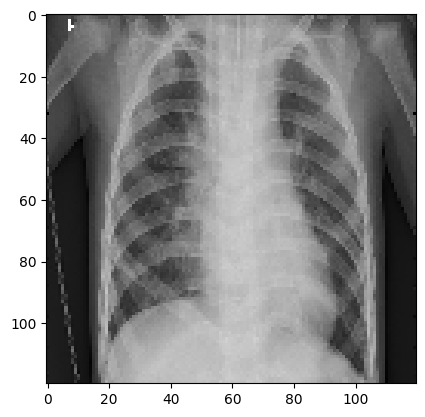

The probability of Pneumonia is:  [0.4608083]


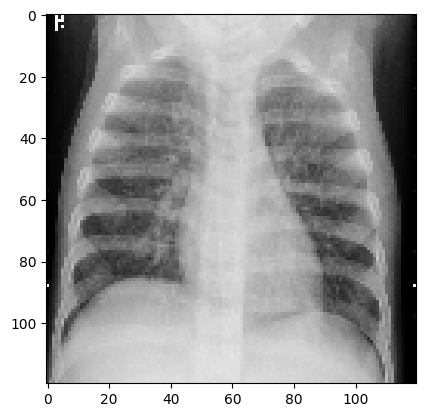

The probability of Pneumonia is:  [0.67774624]


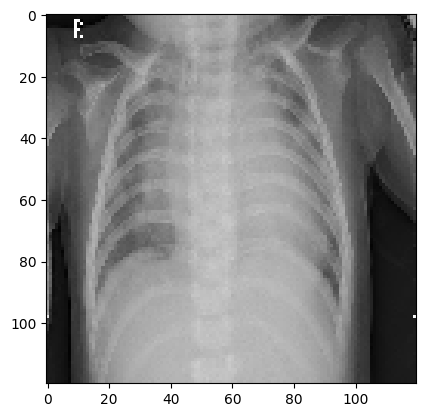

The probability of Pneumonia is:  [0.88964325]


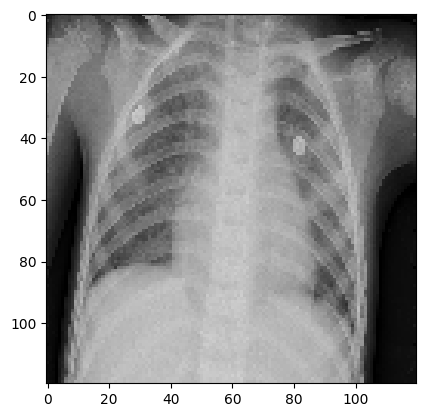

The probability of Pneumonia is:  [0.73532003]


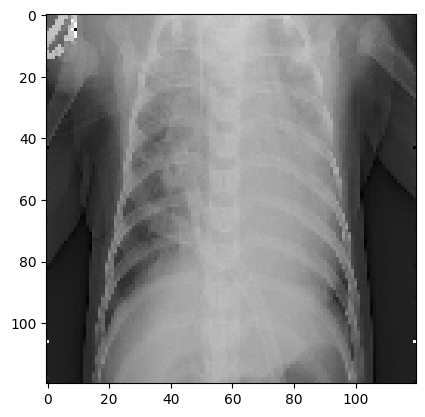

The probability of Pneumonia is:  [0.90680873]


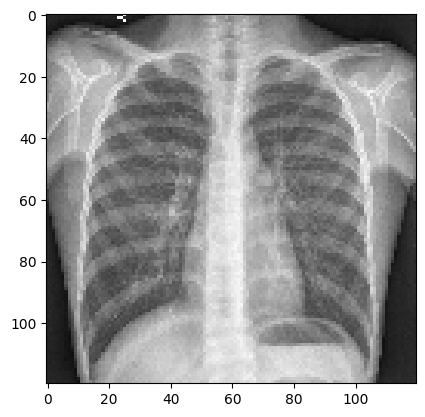

The probability of Pneumonia is:  [0.327191]


In [201]:
batch_size = test.batch_size
num_batches = 1

for i in range(num_batches):
    x, y = next(test)
    predictions = model4.predict(x)
    
    for j in range(min(batch_size, 8)):
        image = x[j]
        plt.imshow(image)
        plt.show()
        print('The probability of Pneumonia is: ', predictions[j])